# You have some data... now what?

Usually, you want to spend some time **exploring the data**. This can include a bunch of things:
- **Sanity checks**: does the data include the columns you're expecting? How are rows unique? Are there duplicates?
- **Hunting for patterns and outliers**: Are there any? What do they look like? Does anything seem correlated?
- **Some descriptive statistics** (mean, standard deviation, histograms)
And just generally getting to know your data!

You can do a lot of this with `pandas`, but pictures contain $\infty$ words, so now's the time to introduce our visualization tools!

## Next tool: `matplotlib`

![matplotlib logo](imgs/matplotlib_logo.png)

[`matplotlib`](https://matplotlib.org/) is one of the most popular plotting libraries in the Python data science stack. You may find people using [`seaborn`](https://seaborn.pydata.org/) or [`bokeh`](https://bokeh.pydata.org/en/latest/), and definitely explore those and other options, but `matplotlib` is the "default" plotting library. It's very powerful and definitely worth investing time in.

However, `matplotlib`'s documentation is... not super friendly. (Unless you have experience [MATLAB](https://www.mathworks.com/products/matlab.html), in which case it may be familiar to you.) You can get a handle on it by keeping the following in mind:
- The basic call for a `matplotlib` chart is `plt.plot(x, y)`.
    - `.plot()`  has lots of additional, handy keyword arguments, like `color='red'`, `alpha=0.2` (20% transparency), and `label="Tuition"`.
- `plt.plot()` doesn't always display the plot, though. Instead, it instantiates a matplotlib pyplot object.
- You can explicitly display the object with `plt.show()`.
- You can modify the object's attributes - e.g. the range of the x- and y-scales, the title, the x- and y-axis labels. For example, to change the title, you can do `plt.plot(x, y)`, then `plt.title("My cool chart title")` and then `plt.show()`!

Here's a good [walkthrough of the object-ness of `matplotlib` charts, and how to use it well](http://pbpython.com/effective-matplotlib.html), and [another one](https://realpython.com/blog/python/python-matplotlib-guide/). No need to go through these now, though! You can get pretty far with just the tips above!

In [1]:
# Tell Jupyter to display matplotlib plots in your notebook
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Let's resize all our charts to be a bit bigger
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 8)

# matplotlib has certain default styles that you can specify at the top of your notebook
# https://matplotlib.org/users/style_sheets.html
# Here, I use the 'bmh' style - just a personal preference!
plt.style.use('bmh')

### Back to the Greeks

Let's explore the Duke Greek life dataset.

In [2]:
# Loading the Greek life data
df = pd.read_csv('data/duke-greek-life.csv')
print(df.shape)
df.head()

(1739, 16)


,Greek Council,Greek Organization,Home City,Home State,Home Country,Latitude of Home City,Longitude of Home City,Free and reduced percentage of High School,Public or Private High School,Domestic or International High School,Boarding/Day High School,Religous High School?,Gender of High School's Students,Tuition of High School,Sports Team,Merit Scholarship
0,None,None,Accokeek,Maryland,United States,38.667617,-77.028309,Data not available,private,Domestic,Day,Episcopal,Co-Ed,36610,None,None
1,None,None,Advance,North Carolina,United States,35.941248,-80.409222,0.34741523,public,Domestic,Day,Unafilliated,Co-Ed,0,Fooball,None
2,None,None,Ajman,NaN,United Arab Emirates,25.509129,55.361907,NaN,private,International,Day,Unafilliated,Co-Ed,13093.46,None,None
3,None,None,Alameda,California,United States,37.609029,-121.899142,0.2268,public,Domestic,Day,Unafilliated,Co-Ed,0,None,None
4,None,None,Albuquerque,New Mexico,United States,35.084103,-106.650985,Data not available,private,Domestic,Day,Unafilliated,Co-Ed,22870,None,None


 I don't really know anything about Duke or its Greek life, so I have a bunch of questions:
- How many students are there? (I'm assuming the level of observation is a student.)
- How many students are in a Greek organization?
- What's the distribution of high school tuitions? (Do Duke students go to fancy high schools?)
- How many had a merit scholarship?
- Where are students from?

In [3]:
# How many students are there?
len(df)

1739

In [4]:
# How many students are in a Greek organization?
df['Greek Organization'].value_counts()

None                   1150
Gamma Phi Beta           39
Kappa Alpha Theta        37
Alpha Delta Pi           34
Zeta Tau Alpha           33
Pi Beta Phi              33
Delta Delta Delta        32
Kappa Kappa Gamma        32
Alpha Phi                30
Delta Sigma Phi          29
Sigma Phi Epsilon        27
Pi Kappa Phi             26
Alpha Tau Omega          25
Delta Gamma              25
Chi Omega                25
Delta Tau Delta          24
Pi Kappa Alpha           21
Kappa Alpha Order        20
Alpha Epsilon Pi         20
Sigma Nu                 17
Sigma Alpha Epsilon      16
Kappa Sigma              11
Sigma Chi                11
Chi Psi                  10
Alpha Delta Phi           6
Delta Kappa Epsilon       3
Psi Upsilon               3
Name: Greek Organization, dtype: int64

In [5]:
# How many Greek orgs are there?
df['Greek Organization'].nunique() - 1

26

In [33]:
# What percentage of students are in a Greek org?
len(df[df['Greek Organization'] != "None"]) / len(df)

0.33870040253018974

In [6]:
# What's the distribution of high school tuitions?
df['Tuition of High School'].describe()

count     1695
unique     394
top          0
freq      1059
Name: Tuition of High School, dtype: object

Ah ha! Our first data cleaning

High school tuition sounds like it should be a **numeric** column, but the `dtype` above is `object`. (That is, `pandas` thinks that column is a string.) Why? 

Let's try to make it numeric with `pandas`'s method, `to_numeric()`:

In [7]:
pd.to_numeric(df['Tuition of High School'])

ValueError: Unable to parse string "16,600" at position 451

The comma in "16,600" is the problem. Let's try to correct it and see if that helps.

In [8]:
df['Tuition of High School'].replace(to_replace="16,600", value="16600", inplace=True)
pd.to_numeric(df['Tuition of High School'])

ValueError: Unable to parse string "1,094.79" at position 829

Hmmm. Still not finished. Also, it's probably not efficient to manually correct for every comma in every column. We can use a shortcut - Python's string methods! These are also available to us in `pandas`:

In [9]:
pd.to_numeric(df['Tuition of High School'].str.replace(',',''))

0       36610.00
1           0.00
2       13093.46
3           0.00
4       22870.00
5       22870.00
6       22870.00
7           0.00
8           0.00
9           0.00
10          0.00
11          0.00
12          0.00
13      14170.00
14          0.00
15          0.00
16          0.00
17          0.00
18          0.00
19      26670.00
20          0.00
21          0.00
22          0.00
23       5450.21
24      20000.00
25      20000.00
26          0.00
27          0.00
28       9494.00
29      15000.00
          ...   
1709        0.00
1710    21518.00
1711        0.00
1712        0.00
1713        0.00
1714    21190.00
1715        0.00
1716        0.00
1717        0.00
1718        0.00
1719        0.00
1720    42830.00
1721    21350.00
1722     8300.00
1723        0.00
1724    13135.00
1725     3165.54
1726    36100.00
1727         NaN
1728         NaN
1729     5508.00
1730    23717.50
1731         NaN
1732        0.00
1733        0.00
1734     8950.00
1735         NaN
1736    58300.

That worked! But we didn't actually change the column. Instead, `pandas` just returned a new Series for us (a Series is a column in a pandas DataFrame). Let's replace the column itself:

In [10]:
df['Tuition of High School'] = pd.to_numeric(df['Tuition of High School'].str.replace(',',''))
df['Tuition of High School'].describe()

count      1695.000000
mean      10555.198232
std       16650.980438
min           0.000000
25%           0.000000
50%           0.000000
75%       20012.500000
max      118660.780000
Name: Tuition of High School, dtype: float64

Perfect! Now we can use one of `pandas`'s built-in plotting methods (yes, it has a few! they're built on top of `matplotlib`) to see a frequency histogram of this data.

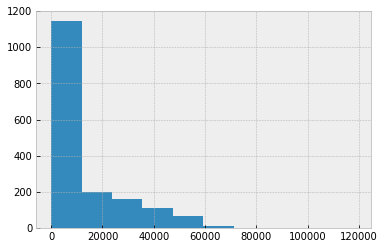

In [12]:
df['Tuition of High School'].hist()

In [13]:
df['Tuition of High School'].isnull().value_counts()

False    1695
True       44
Name: Tuition of High School, dtype: int64

Let's modify this. Let's add:
- More bins! I like more granular histograms.
- A vertical line for the average tuition.

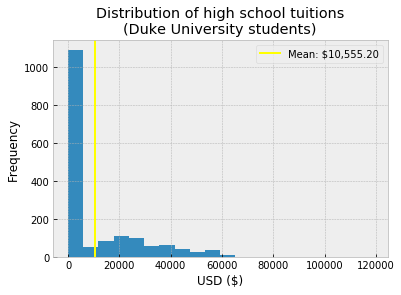

In [14]:
df['Tuition of High School'].hist(bins=20)
plt.axvline(df['Tuition of High School'].mean(), 
            color='yellow', 
            label=f"Mean: ${df['Tuition of High School'].mean():,.2f}")
plt.legend()
plt.title('Distribution of high school tuitions\n(Duke University students)')
plt.xlabel('USD ($)')
plt.ylabel('Frequency')
plt.show()

In [42]:
# Let's one hot encode (AKA make dummy variables) the public or private high school column
df['Public or Private High School'].value_counts()

public                1096
private                625
Data not available      10
Home School              8
Name: Public or Private High School, dtype: int64

In [46]:
school_ohe = pd.get_dummies(df['Public or Private High School'], prefix='school_type')
school_ohe.head()

,school_type_Data not available,school_type_Home School,school_type_private,school_type_public
0,0,0,1,0
1,0,0,0,1
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


In [50]:
# Let's add those dummies back into the original dataframe via merge!
df = pd.merge(df, school_ohe, left_index=True, right_index=True)
df.head()

,Greek Council,Greek Organization,Home City,Home State,Home Country,Latitude of Home City,Longitude of Home City,Free and reduced percentage of High School,Public or Private High School,Domestic or International High School,Boarding/Day High School,Religous High School?,Gender of High School's Students,Tuition of High School,Sports Team,Merit Scholarship,school_type_Data not available,school_type_Home School,school_type_private,school_type_public
0,None,None,Accokeek,Maryland,United States,38.667617,-77.028309,Data not available,private,Domestic,Day,Episcopal,Co-Ed,36610.00,None,None,0,0,1,0
1,None,None,Advance,North Carolina,United States,35.941248,-80.409222,0.34741523,public,Domestic,Day,Unafilliated,Co-Ed,0.00,Fooball,None,0,0,0,1
2,None,None,Ajman,NaN,United Arab Emirates,25.509129,55.361907,NaN,private,International,Day,Unafilliated,Co-Ed,13093.46,None,None,0,0,1,0
3,None,None,Alameda,California,United States,37.609029,-121.899142,0.2268,public,Domestic,Day,Unafilliated,Co-Ed,0.00,None,None,0,0,0,1
4,None,None,Albuquerque,New Mexico,United States,35.084103,-106.650985,Data not available,private,Domestic,Day,Unafilliated,Co-Ed,22870.00,None,None,0,0,1,0


In [51]:
# I've forgotten - which columns do we have?
df.columns

Index(['Greek Council', 'Greek Organization', 'Home City', 'Home State',
       'Home Country', 'Latitude of Home City', 'Longitude of Home City',
       'Free and reduced percentage of  High School',
       'Public or Private High School',
       'Domestic or International High School', 'Boarding/Day High School',
       'Religous High School?', 'Gender of High School's Students',
       'Tuition of High School', 'Sports Team', 'Merit Scholarship',
       'school_type_Data not available', 'school_type_Home School',
       'school_type_private', 'school_type_public'],
      dtype='object')

In [54]:
df['Greek Council'].value_counts() / len(df)

None          0.661875
Sorority      0.184014
Fraternity    0.154112
Name: Greek Council, dtype: float64

In [73]:
# I don't really like typing out the long Proper English Words as column names,
# let's make them lowercase snake_case!
for col in df.columns:
    df.rename(columns={col: col.lower().replace(' ', '_') }, inplace=True)
    
# Check to make sure it worked    
df.head()

,greek_council,greek_organization,home_city,home_state,home_country,latitude_of_home_city,longitude_of_home_city,free_and_reduced_percentage_of__high_school,public_or_private_high_school,domestic_or_international_high_school,boarding/day_high_school,religous_high_school?,gender_of_high_school's_students,tuition_of_high_school,sports_team,merit_scholarship,school_type_data_not_available,school_type_home_school,school_type_private,school_type_public
0,None,None,Accokeek,Maryland,United States,38.667617,-77.028309,Data not available,private,Domestic,Day,Episcopal,Co-Ed,36610.00,None,None,0,0,1,0
1,None,None,Advance,North Carolina,United States,35.941248,-80.409222,0.34741523,public,Domestic,Day,Unafilliated,Co-Ed,0.00,Fooball,None,0,0,0,1
2,None,None,Ajman,NaN,United Arab Emirates,25.509129,55.361907,NaN,private,International,Day,Unafilliated,Co-Ed,13093.46,None,None,0,0,1,0
3,None,None,Alameda,California,United States,37.609029,-121.899142,0.2268,public,Domestic,Day,Unafilliated,Co-Ed,0.00,None,None,0,0,0,1
4,None,None,Albuquerque,New Mexico,United States,35.084103,-106.650985,Data not available,private,Domestic,Day,Unafilliated,Co-Ed,22870.00,None,None,0,0,1,0


### One of the handiest `pandas` methods: `.apply()`

`pandas` has lots of built-in things you can do: summing across rows or columns, taking averages, changing the data types, and so on. But sometimes you want to do something specific and a bit more complicated. For example, you want to use multiple columns to calculate a value. In those cases, `.apply()` is helpful.

I highly recommend watching the [Data School](http://www.dataschool.io/) tutorial on `.apply()`:

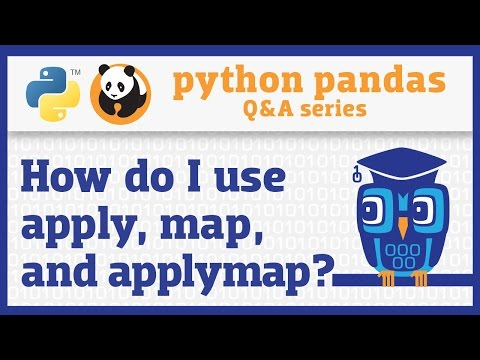

In [55]:
from IPython.display import YouTubeVideo
YouTubeVideo('P_q0tkYqvSk')

I actually had trouble thinking of a good `.apply()` usage with this dataset! So here's a kinda crappy one: let's infer the biological sex of each student observation. We can do this by:
1. Assuming that `Fraternity == male` and `Sorority == female`.
2. Assuming that, if they aren't a member of a Greek organization, they have a 50% likelihood of being male/female.

This will be an imperfect measure, for a bunch of reasons. And we won't correctly assign sex to each observation, we'll just get the right "averages" out. 

Anyway, here's how `.apply()` works! (Side note: We're going to use [`scipy`](https://www.scipy.org/) - another **great data science tool** - to randomly sample from a [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_trial).

In [80]:
from scipy.stats import bernoulli

# This function will take each row as the input
def guessing_sex(row):
    """Male = 1, female = 0
    """
    if row['greek_council'] == 'Fraternity':
        return 1
    elif row['greek_council'] == 'Sorority':
        return 0
    else:
        return bernoulli.rvs(p=0.5)
    
# Applying that function to the dataframe
df['guessed_sex'] = df.apply(guessing_sex, axis=1)
df['guessed_sex'].value_counts() / len(df)

0    0.531915
1    0.468085
Name: guessed_sex, dtype: float64

In [84]:
# Sanity check
for membership in df['greek_council'].unique():
    print(f"\nNow checking: {membership}")
    print(df[df['greek_council']==membership]['guessed_sex'].value_counts() / len(df))


Now checking: None
0    0.347901
1    0.313974
Name: guessed_sex, dtype: float64

Now checking: Fraternity
1    0.154112
Name: guessed_sex, dtype: float64

Now checking: Sorority
0    0.184014
Name: guessed_sex, dtype: float64


# Onto [statistics and machine learning $\rightarrow$](2_StatsML.ipynb)